In [1]:
import os
os.environ['KERAS_BACKEND'] = 'torch'

import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

# Init Fidle environment
import fidle

run_id, run_dir, datasets_dir = fidle.init('K3MNIST1')


<br>**FIDLE - Environment initialization**

Version              : 2.3.2
Run id               : K3MNIST1
Run dir              : ./run/K3MNIST1
Datasets dir         : C:\Users\YM278243\Desktop\fidle-tp\datasets-fidle
Start time           : 06/09/24 10:53:15
Hostname             : gre063413 (Windows)
Tensorflow log level : Info + Warning + Error  (=0)
Update keras cache   : False
Update torch cache   : False
Save figs            : ./run/K3MNIST1/figs (False)
keras                : 3.5.0
numpy                : 1.26.4
sklearn              : 1.4.2
yaml                 : 6.0.1
matplotlib           : 3.8.4
pandas               : 2.2.2
torch                : 2.4.0


In [3]:
fit_verbosity = 1

In [5]:
fidle.override('fit_verbosity')

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


In [9]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


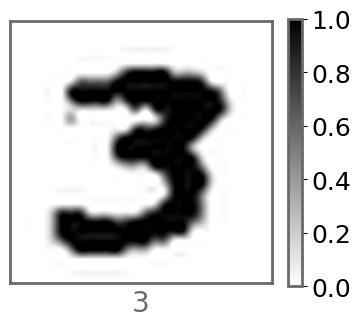

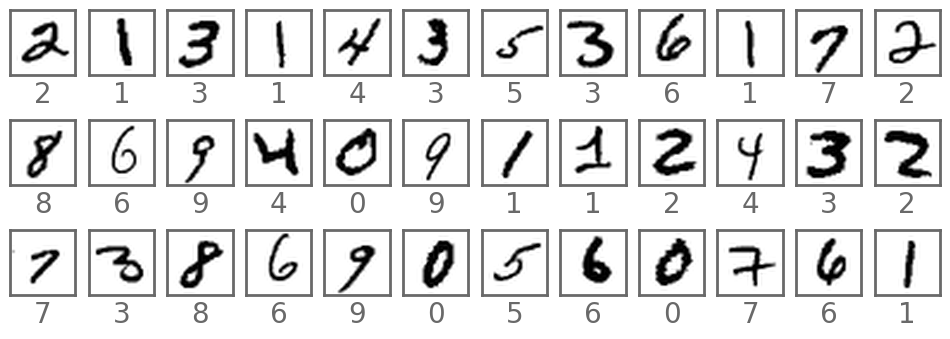

In [11]:
fidle.scrawler.images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
fidle.scrawler.images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')



In [13]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7361 - loss: 1.0051 - val_accuracy: 0.9253 - val_loss: 0.2593
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9277 - loss: 0.2486 - val_accuracy: 0.9439 - val_loss: 0.1930
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9487 - loss: 0.1812 - val_accuracy: 0.9542 - val_loss: 0.1530
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9592 - loss: 0.1397 - val_accuracy: 0.9617 - val_loss: 0.1300
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9677 - loss: 0.1128 - val_accuracy: 0.9670 - val_loss: 0.1133
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9713 - loss: 0.0981 - val_accuracy: 0.9690 - val_loss: 0.1016
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9757 - loss: 0.0829 - val_accuracy: 0.9703 - val_loss: 0.0986
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9788 - loss: 0.0706 - val_accu

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.07546018064022064
Test accuracy : 0.9768999814987183


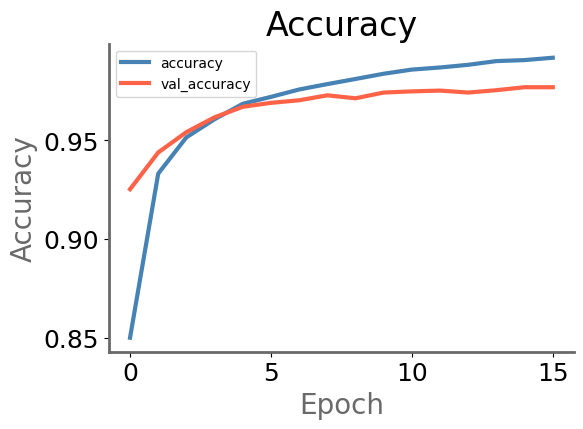

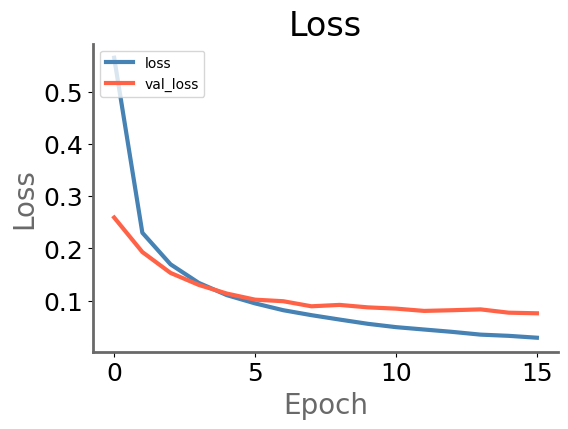

In [19]:
fidle.scrawler.history(history, figsize=(6,4), save_as='03-history')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


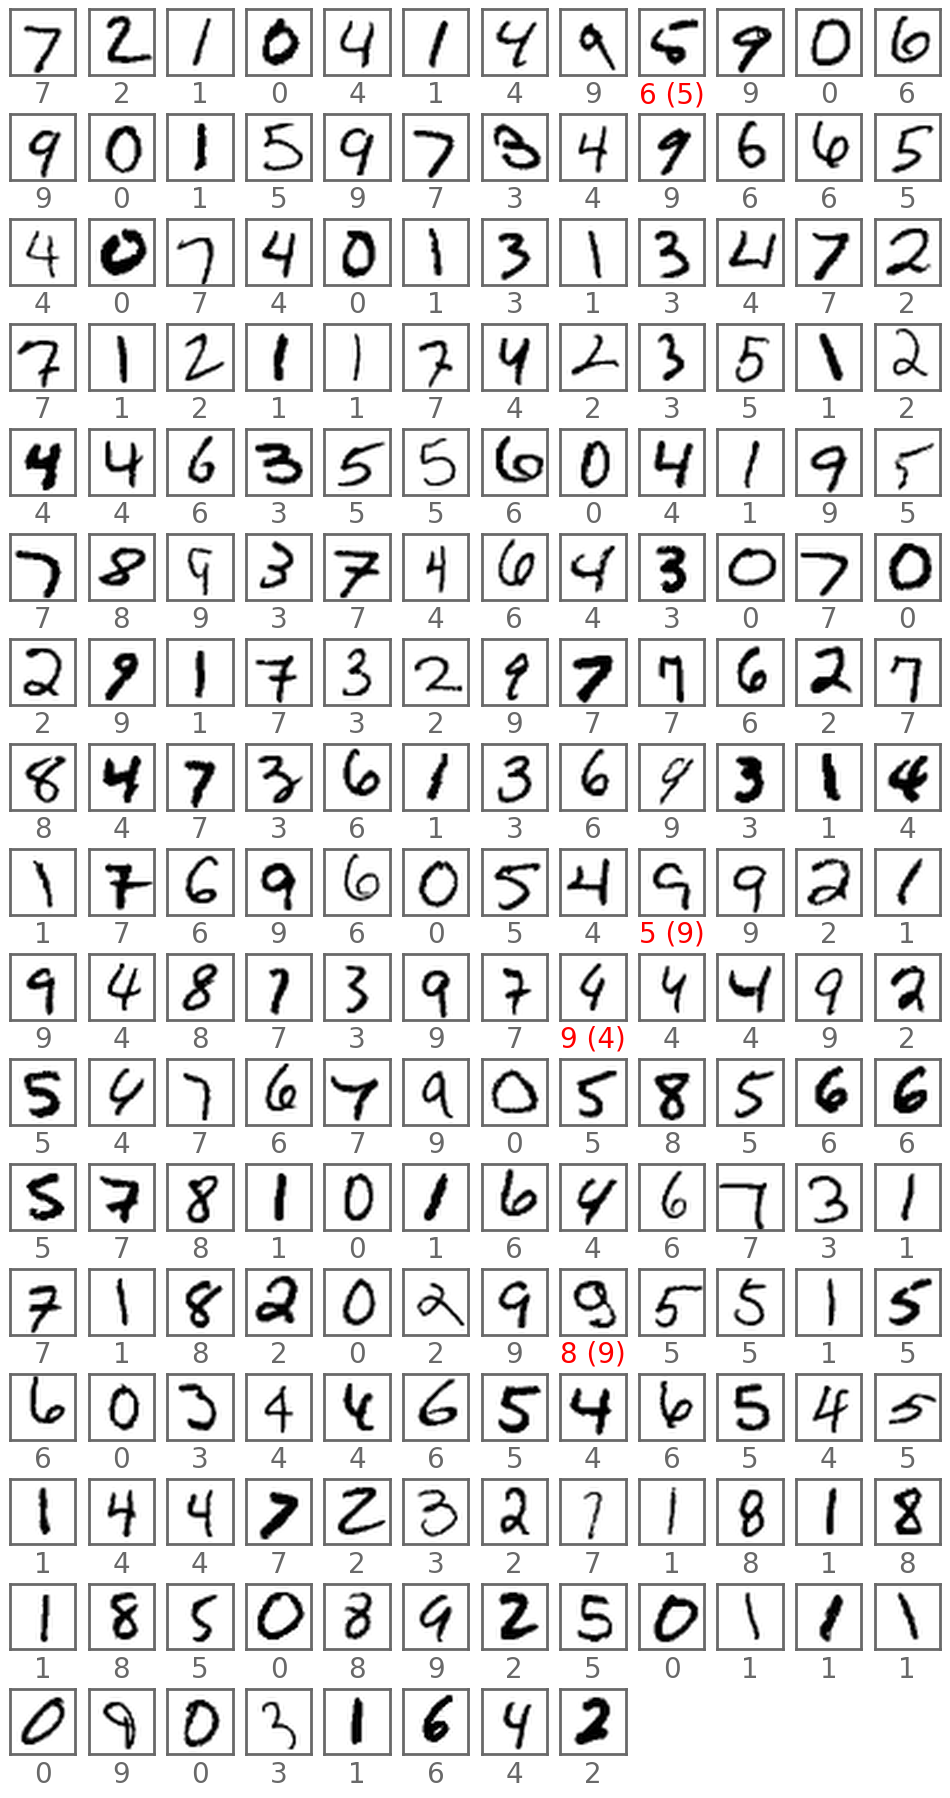

In [21]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test, verbose=fit_verbosity)
y_pred    = np.argmax(y_sigmoid, axis=-1)

fidle.scrawler.images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

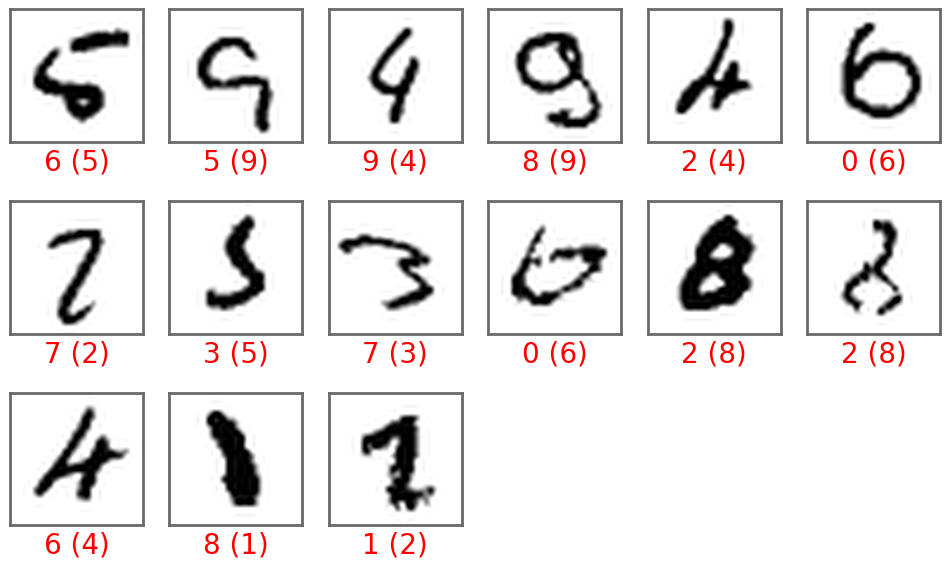

In [23]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
fidle.scrawler.images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

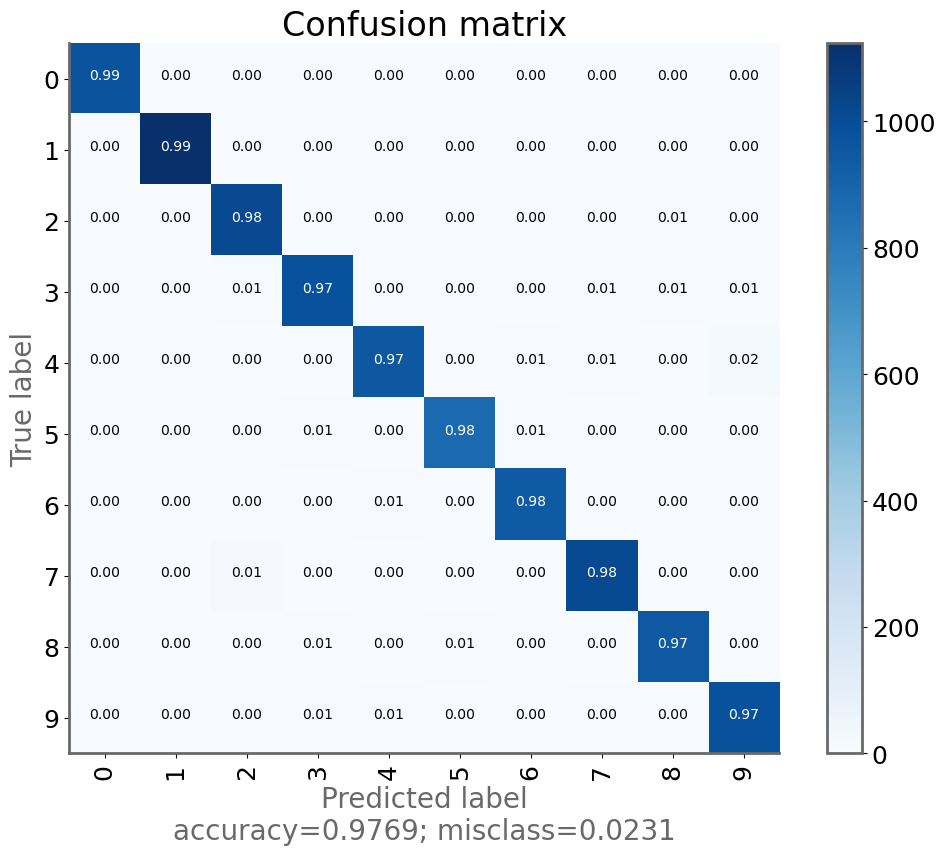

In [25]:
fidle.scrawler.confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')